## TODO:
    1- Add more comments to processes and functions
    2- Modify code for more people
    3- Add conclusions to plots

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import glob
import re

#### Read file

In [10]:
#list_data = glob.glob("../data/*")
#list_data.remove('../data/eeuu_member_of_congress.csv')
#len(list_data)

In [11]:
df_eeuu_member_of_congress = pd.read_csv('https://raw.githubusercontent.com/alexferrero23/twitter-category-nlp/develop/data/eeuu_member_of_congress.csv', sep=';')

In [36]:
list_senators = df_eeuu_member_of_congress['Twitter'].dropna().tolist()
list_senators = [x.replace('@', '') for x in list_senators]
list_senators = [x.replace(' ', '') for x in list_senators]

In [30]:
#re.search('data/(.*).csv', list_data[0]).group(1)

In [37]:
df = pd.DataFrame(columns=["id", "user", "username", "created_at", "text", "lang", "label","retweet_count", "favorite_count"])

for user in list_senators:
    try:
        df_user = pd.read_csv(f"https://raw.githubusercontent.com/alexferrero23/twitter-category-nlp/develop/data/{user}.csv", sep="|")
        #user = re.search('data/(.*).csv', path).group(1)
        df_user['username'] = user
        df = pd.concat([df, df_user], ignore_index=True)
    except Exception as e:
        print(e)
        print(f"User {user} was not read")

#df = pd.read_csv(list_data[0], sep="|")
#Only in english
df = df[df['lang']=='en']
print(f"Len of the dataframe: {len(df)}")

Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.

User RepRonKind was not read
HTTP Error 404: Not Found
User SenatorLeahy was not read
Len of the dataframe: 938825


In [38]:
df.head()

,id,user,username,created_at,text,lang,label,retweet_count,favorite_count
0,1506705587903598597,2916086925,RepAdams,Wed Mar 23 18:53:00 +0000 2022,"Madeleine Albright often said, “There is a spe...",en,D,56,196
1,1506279598140633101,2916086925,RepAdams,Tue Mar 22 14:40:16 +0000 2022,Judge Ketanji Brown Jackson:\n\n✔️ Received a ...,en,D,13,26
2,1506012530824531975,2916086925,RepAdams,Mon Mar 21 20:59:02 +0000 2022,When I Grow Up is a virtual forum designed to ...,en,D,5,4
3,1505996638401224708,2916086925,RepAdams,Mon Mar 21 19:55:53 +0000 2022,"Ketanji Brown Jackson's parents, Ellery &amp; ...",en,D,8,31
4,1505906800272490506,2916086925,RepAdams,Mon Mar 21 13:58:54 +0000 2022,Judge Ketanji Brown Jackson is the most qualif...,en,D,19,102


In [39]:
df.label.unique()

array(['D', 'R', 'I'], dtype=object)

In [40]:
df[df['label']=='I'].username.unique()

array(['SenAngusKing', 'SenSanders'], dtype=object)

#### There are two members who are independent, but according to their political career, both will be considered as democrats as both have caucused with the Democratic Party 

In [41]:
df['label'] = df['label'].apply(lambda x: x.replace('I', 'D'))

#### First of all, lets transform twitter date to python datetime

In [42]:
def twitter_date_to_datetime(twitter_date):
    return datetime.strptime(twitter_date,'%a %b %d %H:%M:%S +0000 %Y')

In [43]:
df['created_at'] = df['created_at'].apply(twitter_date_to_datetime)

In [44]:
df.head()

,id,user,username,created_at,text,lang,label,retweet_count,favorite_count
0,1506705587903598597,2916086925,RepAdams,2022-03-23 18:53:00,"Madeleine Albright often said, “There is a spe...",en,D,56,196
1,1506279598140633101,2916086925,RepAdams,2022-03-22 14:40:16,Judge Ketanji Brown Jackson:\n\n✔️ Received a ...,en,D,13,26
2,1506012530824531975,2916086925,RepAdams,2022-03-21 20:59:02,When I Grow Up is a virtual forum designed to ...,en,D,5,4
3,1505996638401224708,2916086925,RepAdams,2022-03-21 19:55:53,"Ketanji Brown Jackson's parents, Ellery &amp; ...",en,D,8,31
4,1505906800272490506,2916086925,RepAdams,2022-03-21 13:58:54,Judge Ketanji Brown Jackson is the most qualif...,en,D,19,102


#### Now let's check out the length of tweets

In [45]:
df['length'] = df['text'].apply(lambda x: len(x))

In [46]:
df.head()

,id,user,username,created_at,text,lang,label,retweet_count,favorite_count,length
0,1506705587903598597,2916086925,RepAdams,2022-03-23 18:53:00,"Madeleine Albright often said, “There is a spe...",en,D,56,196,140
1,1506279598140633101,2916086925,RepAdams,2022-03-22 14:40:16,Judge Ketanji Brown Jackson:\n\n✔️ Received a ...,en,D,13,26,140
2,1506012530824531975,2916086925,RepAdams,2022-03-21 20:59:02,When I Grow Up is a virtual forum designed to ...,en,D,5,4,140
3,1505996638401224708,2916086925,RepAdams,2022-03-21 19:55:53,"Ketanji Brown Jackson's parents, Ellery &amp; ...",en,D,8,31,144
4,1505906800272490506,2916086925,RepAdams,2022-03-21 13:58:54,Judge Ketanji Brown Jackson is the most qualif...,en,D,19,102,140


In [47]:
df_democrats = df[df['label']=='D']
df_republicans = df[df['label']=='R']

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


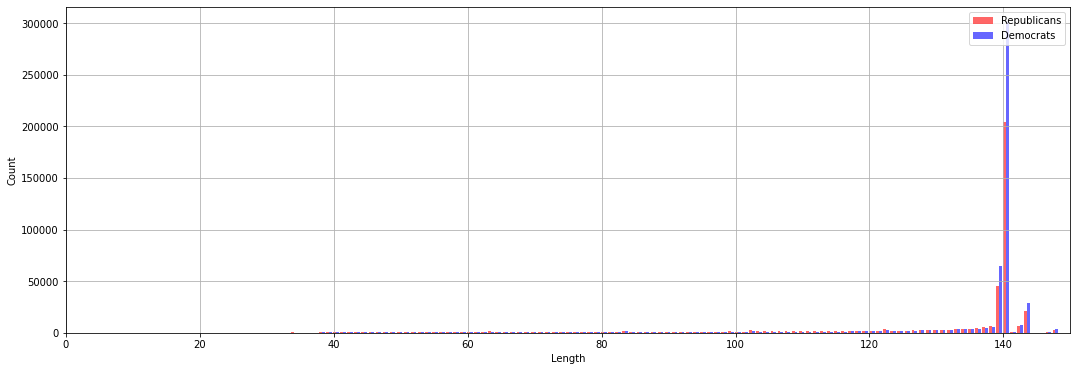

In [48]:
plt.rcParams['figure.figsize'] = (18, 6)
bins = 150
plt.hist([df_republicans['length'], df_democrats['length']], alpha = 0.6, bins=bins, 
         label=['Republicans', 'Democrats'], color = ['r','b'])
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.xlim(0,150)
plt.grid()
plt.show()

#### Characters in tweets

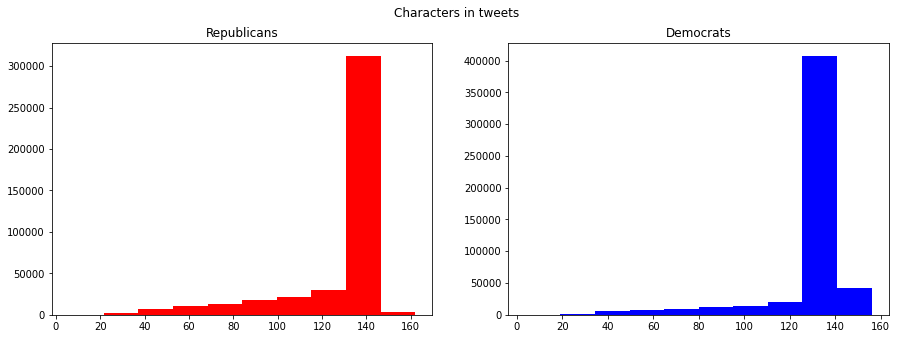

In [49]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
tweet_len_r=df_republicans['text'].str.len()
ax1.hist(tweet_len_r, color='r')
ax1.set_title('Republicans')
tweet_len_d=df_democrats['text'].str.len()
ax2.hist(tweet_len_d, color='b')
ax2.set_title('Democrats')
fig.suptitle('Characters in tweets')
plt.show()

#### Temporal distribution of tweets by month

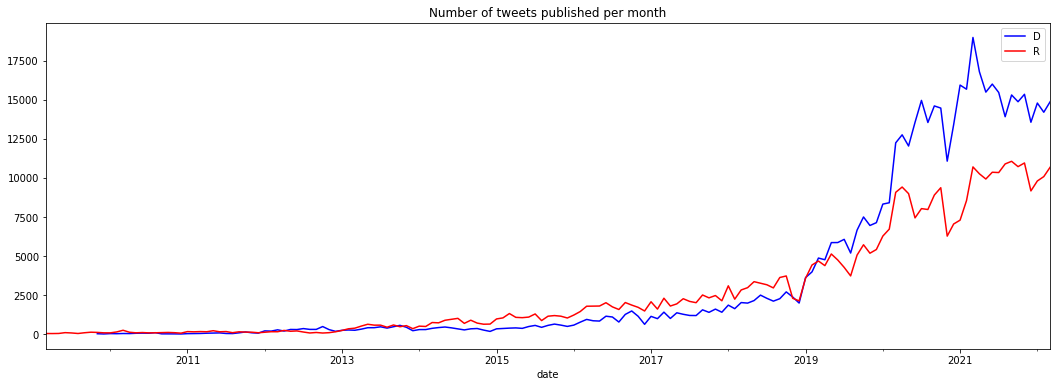

In [50]:
fig, ax = plt.subplots(figsize=(18, 6))

for label in df.label.unique():
    df_temp = df[df['label'] == label].copy()
    df_temp['date'] = pd.to_datetime(df_temp['created_at'].dt.strftime('%m/%Y'))
    df_temp = df_temp.groupby(df_temp['date']).size()
    color = 'r' if label == 'R' else 'b'
    df_temp.plot(label=label, ax=ax, color=color)

ax.set_title('Number of tweets published per month')
ax.legend();

#### Number of words in tweets

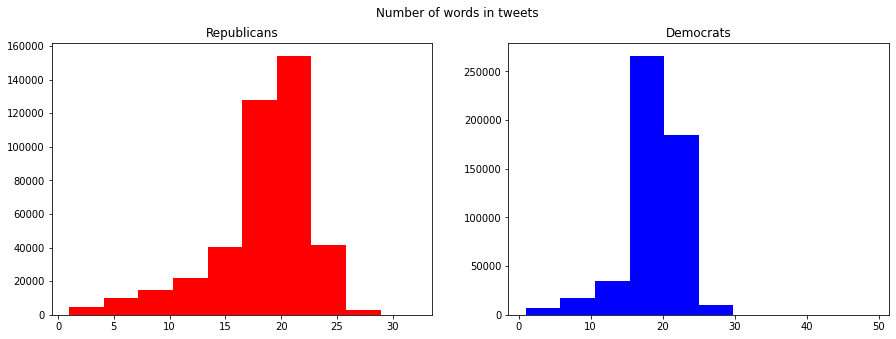

In [51]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
tweet_len_r=df_republicans['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len_r, color='r')
ax1.set_title('Republicans')
tweet_len_d=df_democrats['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len_d, color='b')
ax2.set_title('Democrats')
fig.suptitle('Number of words in tweets')
plt.show()

#### Average word lenght in tweets

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


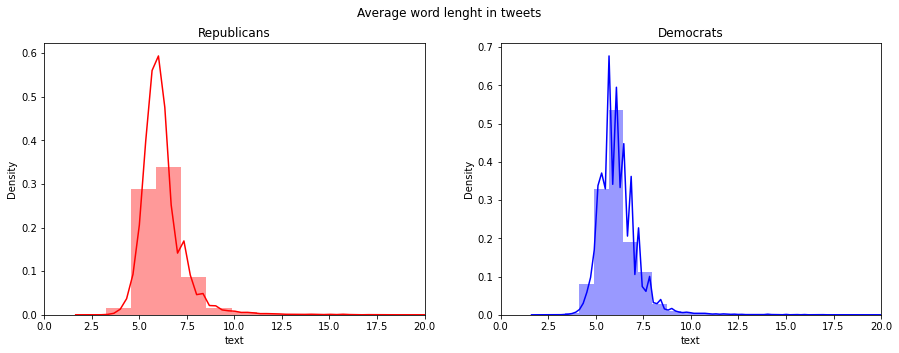

In [52]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
word=df_republicans['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='r')
ax1.set_title('Republicans')
ax1.set(xlim=(0, 20))
word=df_democrats['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='b')
ax2.set_title('Democrats')
ax2.set(xlim=(0, 20))
fig.suptitle('Average word lenght in tweets');

In [54]:
def create_list_of_words(label):
    list_of_words=[]
    
    for x in df[df['label']==label]['text'].str.split():
        for i in x:
            list_of_words.append(i)
    return list_of_words

In [55]:
create_list_of_words(label='R')[:20]

['I',
 'have',
 'joined',
 'my',
 'fellow',
 'co-chairs',
 'of',
 'the',
 'Congressional',
 'Coalition',
 'on',
 'Adoption',
 'in',
 'penning',
 'a',
 'letter',
 'to',
 'U.S.',
 'Secretary…',
 'https://t.co/5tsuISYbOL']

#### Punctuation and strange characters in tweets

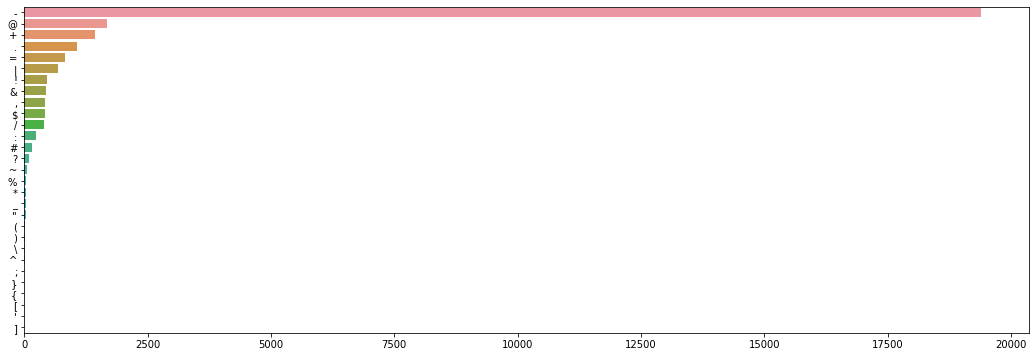

In [56]:
import string

plt.figure(figsize=(18,6))
list_of_words = create_list_of_words(label='R') + create_list_of_words(label='D')

punctuation = string.punctuation
special_characters = []

for word in list_of_words:
    if word in punctuation:
        special_characters.append(word)
        
dict_count_characters = {i:special_characters.count(i) for i in special_characters}
dict_count_characters_ordered = sorted(dict_count_characters.items(), key=lambda x: x[1], reverse=True)

characters = [i[0] for i in dict_count_characters_ordered]
count = [i[1] for i in dict_count_characters_ordered]

sns.barplot(x=count,y=characters);

#### Most common words in tweets

In [61]:
from collections import Counter

list_of_words_republicans = create_list_of_words(label='R')
list_of_words_democrats = create_list_of_words(label='D')
top_used_words_republicans = dict(Counter(list_of_words_republicans))
top_used_words_democrats = dict(Counter(list_of_words_democrats))
top_used_words_ordered_republicans = sorted(top_used_words_republicans.items(), key=lambda x: x[1], reverse=True)
top_used_words_ordered_democrats = sorted(top_used_words_democrats.items(), key=lambda x: x[1], reverse=True)
top_used_words_ordered_republicans[:5]

[('the', 310206),
 ('to', 278773),
 ('of', 145827),
 ('and', 136995),
 ('in', 118824)]

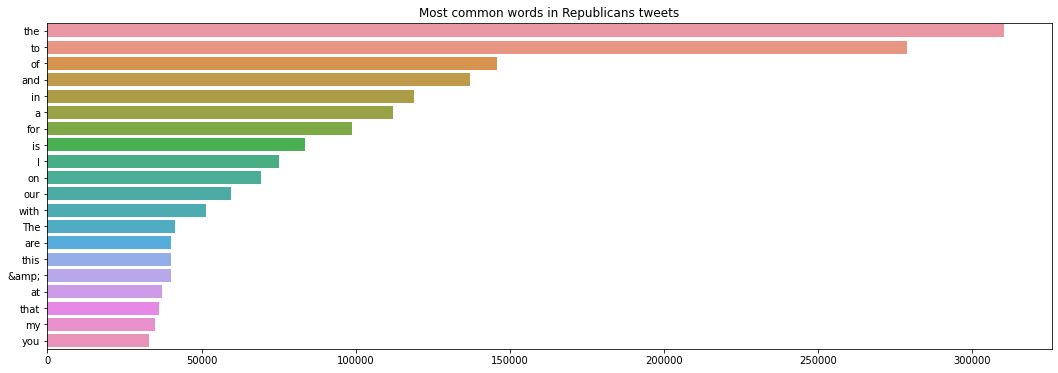

In [62]:
words = [i[0] for i in top_used_words_ordered_republicans[:20]]
count = [i[1] for i in top_used_words_ordered_republicans[:20]]
sns.barplot(x=count,y=words).set_title('Most common words in Republicans tweets');

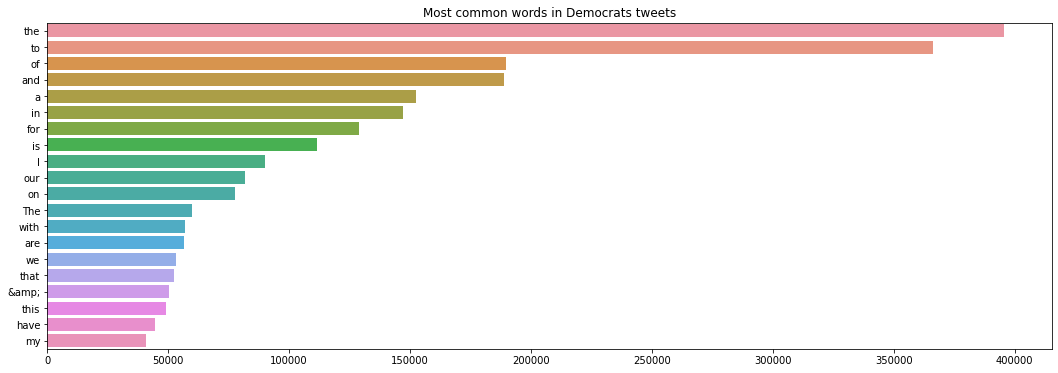

In [63]:
words = [i[0] for i in top_used_words_ordered_democrats[:20]]
count = [i[1] for i in top_used_words_ordered_democrats[:20]]
sns.barplot(x=count,y=words).set_title('Most common words in Democrats tweets');

#### Most common words in tweets which are not stop words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


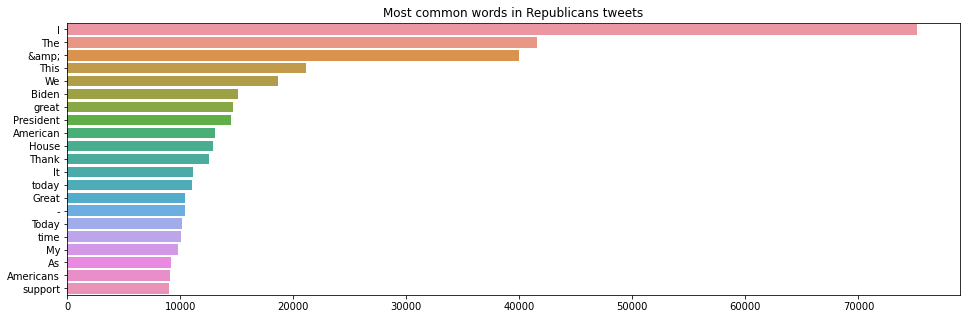

In [64]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))

words = []
count = []
for word, number in top_used_words_ordered_republicans:
    if len(words) > 20:
        break
    elif (word not in stop):
        words.append(word)
        count.append(number)

plt.figure(figsize=(16,5))
sns.barplot(x=count,y=words).set_title('Most common words in Republicans tweets');

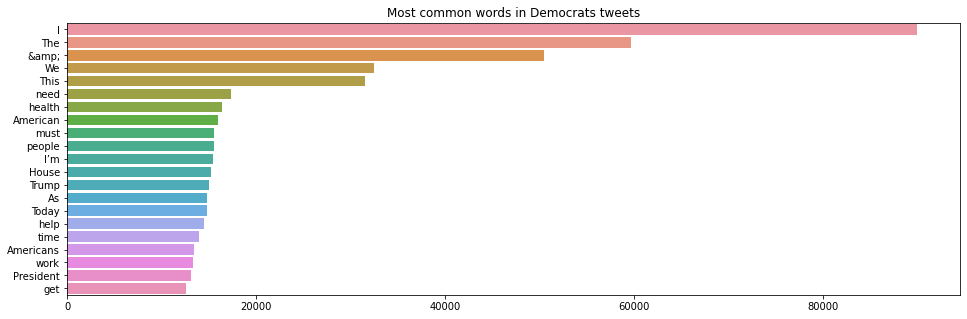

In [65]:
words = []
count = []
for word, number in top_used_words_ordered_democrats:
    if len(words) > 20:
        break
    elif (word not in stop):
        words.append(word)
        count.append(number)

plt.figure(figsize=(16,5))
sns.barplot(x=count,y=words).set_title('Most common words in Democrats tweets');

#### Most common pairs of words in tweets

In [66]:
def create_list_of_bigrams(label):
    list_of_bigrams=[]
    
    for x in df[df['label']==label]['text'].str.split():
        for i in range(len(x)-1):
            list_of_bigrams.append(tuple(x[i:i+2]))
    return list_of_bigrams

In [73]:
list_of_bigrams_republicans = create_list_of_bigrams(label='R')
list_of_bigrams_democrats = create_list_of_bigrams(label='D')

In [74]:
top_used_bigrams_republicans = dict(Counter(list_of_bigrams_republicans))
top_used_bigrams_democrats = dict(Counter(list_of_bigrams_democrats))
top_used_bigrams_ordered_republicans = sorted(top_used_bigrams_republicans.items(), key=lambda x: x[1], reverse=True)
top_used_bigrams_ordered_democrats = sorted(top_used_bigrams_democrats.items(), key=lambda x: x[1], reverse=True)
top_used_bigrams_ordered_republicans[:5]

[(('of', 'the'), 31525),
 (('to', 'the'), 19869),
 (('in', 'the'), 19288),
 (('on', 'the'), 16871),
 (('for', 'the'), 15270)]

In [75]:
#transform the bigrams from tuple to string
for i in range(len(top_used_bigrams_ordered_republicans)):
    top_used_bigrams_ordered_republicans[i] = (" ".join(top_used_bigrams_ordered_republicans[i][0]), top_used_bigrams_ordered_republicans[i][1])
for i in range(len(top_used_bigrams_ordered_democrats)):
    top_used_bigrams_ordered_democrats[i] = (" ".join(top_used_bigrams_ordered_democrats[i][0]), top_used_bigrams_ordered_democrats[i][1])

In [76]:
top_used_bigrams_ordered_republicans[:20]

[('of the', 31525),
 ('to the', 19869),
 ('in the', 19288),
 ('on the', 16871),
 ('for the', 15270),
 ('at the', 11193),
 ('Thank you', 10717),
 ('is a', 10644),
 ('to be', 9172),
 ('I am', 8437),
 ('and the', 7487),
 ('with the', 6970),
 ('of our', 6890),
 ('to see', 6850),
 ('to discuss', 6766),
 ('This is', 6416),
 ('you to', 6283),
 ('will be', 5975),
 ('and I', 5824),
 ('a great', 5659)]

<AxesSubplot:>

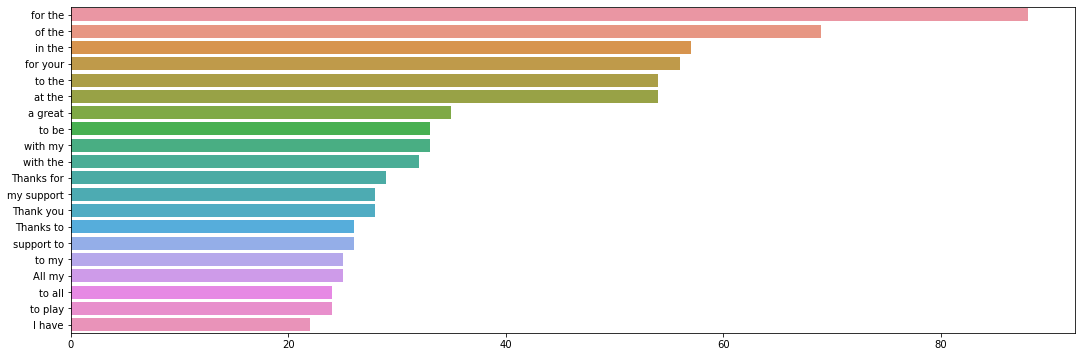

In [ ]:
x,y=map(list,zip(*top_used_bigrams_ordered_republicans[:20]))
sns.barplot(x=y,y=x).set_title('Most common pairs of words in Republicans tweets')

Text(0.5, 1.0, 'Most common pairs of words in Republicans tweets')

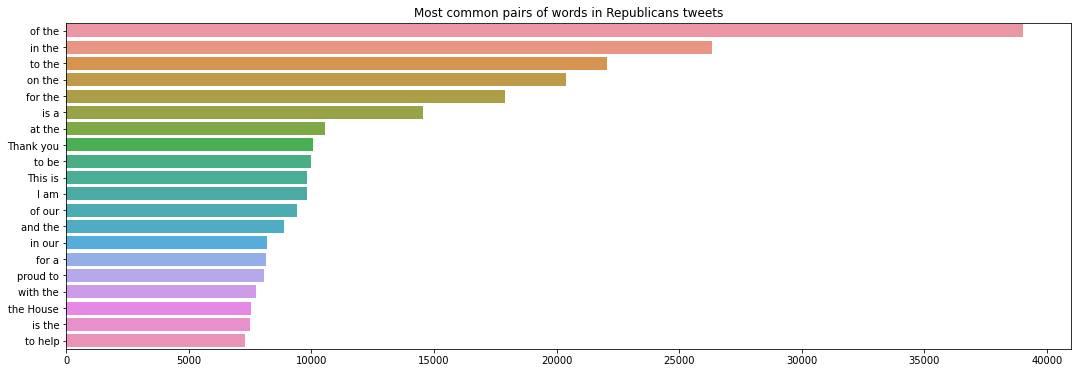

In [77]:
x,y=map(list,zip(*top_used_bigrams_ordered_democrats[:20]))
sns.barplot(x=y,y=x).set_title('Most common pairs of words in Republicans tweets')

#### I suspect that there are gonna be URLs

In [78]:
df.query('text.str.contains("http")', engine='python')

,id,user,username,created_at,text,lang,label,retweet_count,favorite_count,length
0,1506705587903598597,2916086925,RepAdams,2022-03-23 18:53:00,"Madeleine Albright often said, “There is a spe...",en,D,56,196,140
1,1506279598140633101,2916086925,RepAdams,2022-03-22 14:40:16,Judge Ketanji Brown Jackson:\n\n✔️ Received a ...,en,D,13,26,140
2,1506012530824531975,2916086925,RepAdams,2022-03-21 20:59:02,When I Grow Up is a virtual forum designed to ...,en,D,5,4,140
3,1505996638401224708,2916086925,RepAdams,2022-03-21 19:55:53,"Ketanji Brown Jackson's parents, Ellery &amp; ...",en,D,8,31,144
4,1505906800272490506,2916086925,RepAdams,2022-03-21 13:58:54,Judge Ketanji Brown Jackson is the most qualif...,en,D,19,102,140
...,...,...,...,...,...,...,...,...,...,...
953911,1100533350127861765,2750127259,RepLeeZeldin,2019-02-26 23:09:32,Wishing POTUS &amp; his team the very best thi...,en,R,54,325,144
953912,1100436653812973568,2750127259,RepLeeZeldin,2019-02-26 16:45:18,Infanticide couldn't be more wrong. \n\nSuppor...,en,R,181,575,140
953913,1100365549614309376,2750127259,RepLeeZeldin,2019-02-26 12:02:45,#CancerPreventionMonth raises awareness of ste...,en,R,2,18,143
953915,1099288604642340865,2750127259,RepLeeZeldin,2019-02-23 12:43:21,#AmericanHeartMonth raises awareness of heart ...,en,R,11,28,144


# WE HAVE TO CLEAN EVERYTHING, THIS IS FULL OF SHIT